<a href="https://colab.research.google.com/github/JoanesMiranda/Machine-learning/blob/master/desafio_titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como consegui um score de 0.80861 na competição do Titanic Kaggle

**Instrodução**

- Foi realizado uma analise da base de dados do titanic disponivel em: https://www.kaggle.com/c/titanic, o Titanic era um navio de passageiros britânico que afundou no Oceano Atlântico Norte nas primeiras horas de 15 de abril de 1912, depois de colidir com um iceberg durante sua primeira viagem de Southampton a Nova York. Havia cerca de 2.224 passageiros e tripulantes a bordo, e mais de 1.500 morreram, tornando-o um dos mais fatais desastres marítimos comerciais em tempos de paz da história moderna. O RMS Titanic foi o maior navio em circulação no momento em que entrou em serviço e foi o segundo de três transatlânticos de classe olímpica operados pela White Star Line.

- A baixo demonstro passo a passo a analise da base de dados titanic e os recusos utilizados nas etapas de exploração, pre-processamento e criação do modelo de dados.

![titanic](https://miro.medium.com/max/1400/1*5UZeUPAX6JO06--XKtC4oQ.jpeg)

### Etapa 1: Conhecendo os dados

- PassengerId: Id do passageiro;
- Survived: Composto por 0 e 1, informa se o passageiro sobreviveu ao desastre. O valor 0 é indicado para aqueles que não sobreviveram e o valor 1 para aqueles que sobreviveram;
- Pclass: Classe na qual o passageiro estava, temos três valores de - classe, 1, 2 e 3;
- Name: Nome do passageiro;
- Sex: Sexo do passageiro;
- Age: Idade do passageiro;
- Sibsp: Número de irmãos / cônjuges a bordo;
- Parch: Número de pais / filhos a bordo;
- Ticket: Número da passagem;
- Fare: Preço pago na passagem;
- Cabin: Número da cabine;
- Embarked: Informa de qual porto o passageiro embarcou. “S” significa Southampton, “C” é referente a Cherbourg e “Q” para Queenstown.

##### Importação das bibliotecas necessarias

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##### Abrindo um diretorio do google driver e importando as bases de dados para o projeto

In [1933]:
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/DADOS/titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/DADOS/titanic/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Etapa 2: Análise exploratória dos dados

In [1934]:
train.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [1935]:
train.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

- Utilizando o pandas_profiling podemos exibir diversas informações, como valores ausentes, histograma, descio padrão, mapa de calor, dentre outros. Todos as informações geradas são exibidas em um relatório html interativo.

Instalação do pandas pandas_profiling:

In [1936]:
!pip install pandas_profiling

In [1937]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

#### Quantidade de sobreviventes por sexo
- As mulheres têm uma taxa de sobrevivência de 74%, enquanto os homens têm uma taxa de sobrevivência de cerca de 19%.

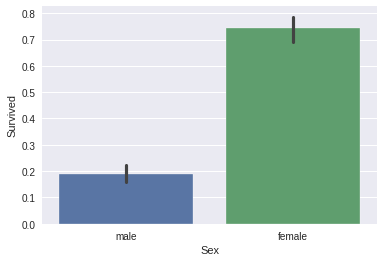

In [1938]:
sns.barplot(train['Sex'], train['Survived'], data=train)

- Classe na qual o passageiros sobreviventes estavam.

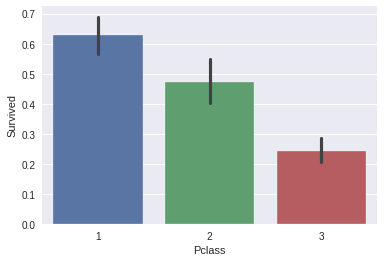

In [1939]:
sns.barplot(train['Pclass'], train['Survived'], data=train)

- Preço pago na passagem

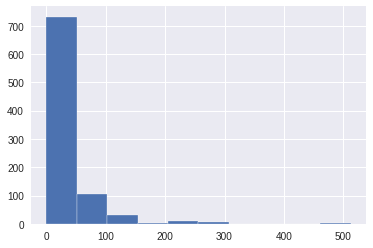

In [1940]:
train['Fare'].hist()

- Idade dos passageiros sobreviventes

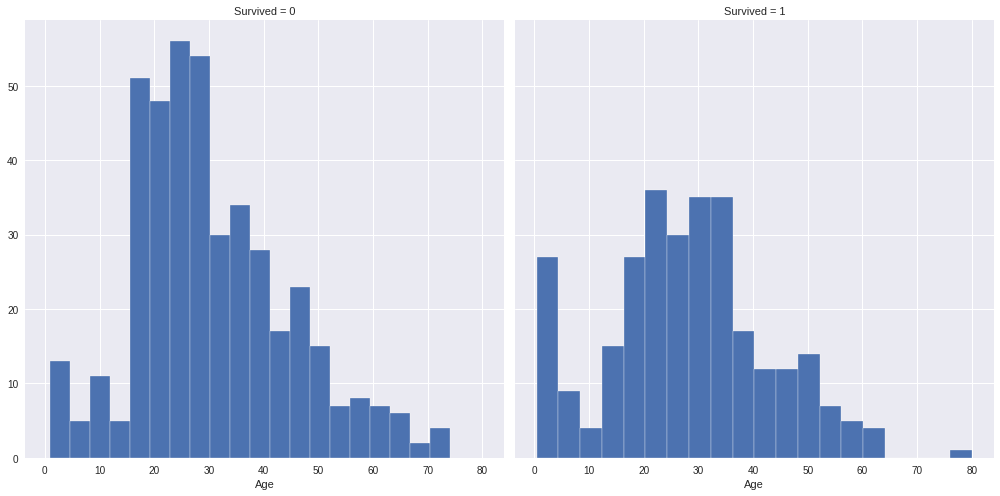

In [1941]:
g = sns.FacetGrid(train, col='Survived', height=7)
g.map(plt.hist, 'Age', bins=20)

- Relação entre os lugares que os passageiros embarcaram e a quatidade de  sobreviventes


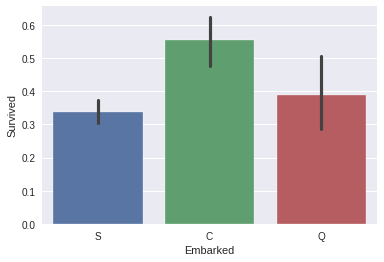

In [1942]:
sns.barplot(train['Embarked'], train['Survived'], data=train)

### Etapa 3 - pré-processamento dos dados

- Verificando se a base de dados possuem valores nulos

In [1943]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- Removendo valores nulos de Fare e aplicando um logaritimo

In [1944]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

print("Antes: \n")
print(train['Fare'].describe())

# recebendo na variavel 'join_dts' as  bases de dados de treino e teste
join_dts = [train, test]
for dataset in join_dts:
    dataset['Fare'] = dataset['Fare'].apply(lambda x : 10 * np.log(x) if x>0 else 0)

print("\nDepois:\n")

print(train['Fare'].describe())

Antes: 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Depois:

count    891.000000
mean      28.938462
std       10.028989
min        0.000000
25%       20.681766
50%       26.709850
75%       34.339872
max       62.389674
Name: Fare, dtype: float64


#### Criando uma nova variavel 'Family' no dataset contendo (SibSp + Parch) e analisando a relação com os sobreviventes.

- Sibsp: Número de irmãos / cônjuges a bordo;
- Parch: Número de pais / filhos a bordo;

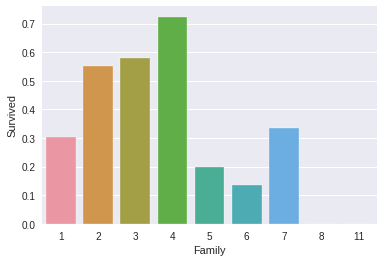

In [1945]:
for dataset in join_dts:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

sns.barplot('Family', 'Survived', data=train, ci=None)


####  Preenchedo valores nulos de Embarqued e tranformando em dados numericos

- "S" - Southampton: 0
- "C" - Cherbourg:   1
- "Q" - Queenstown:  2

#### Tranformando os dados de Sex em dados numericos
- "female": 1
- "male":   0

In [0]:
for dataset in join_dts:
    dataset['Embarked'].fillna('S', inplace=True)
    dataset['Embarked'].replace({'C':0, 'Q':1, 'S':2}, inplace=True)
    dataset['Sex'].replace({'female':1, 'male':0}, inplace=True)

- Verificando a correlação entre os dados

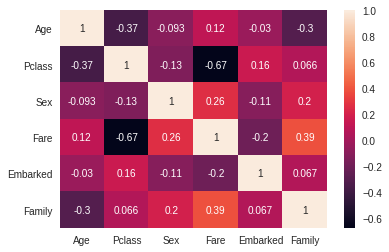

In [1947]:
sns.heatmap(train[['Age', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family']].corr(), annot=True)

- Preenchendo valores nulos com a mediana

In [0]:
pc_values = [1,2,3]
fs_values = [1,2,3,4,5,6,7,8,11]
for dataset in join_dts:
    for i in pc_values:
        for j in fs_values:
            age_guess = dataset.loc[(dataset['Pclass']==i)&(dataset['Family']==j), 'Age'].dropna().median()
            dataset.loc[(dataset['Pclass']==i)&(dataset['Family']==j&(dataset['Age'].isnull())), 'Age'] = age_guess


- Preenchendo a idade com a mediana

In [0]:
for dataset in join_dts:
    age = dataset['Age'].dropna().median()
    dataset['Age'].fillna(age, inplace=True)

- Agrupando em categorias: 3: (0 - 10),   1: (10 - 35),  2: (35 - 65),  0: (65-200)

In [0]:
cut_bins = [0,10,35,65,200]
cut_label = [3, 1, 2, 0]
for dataset in join_dts:
    dataset['AgeBand'] = pd.cut(train['Age'], bins=cut_bins, labels=cut_label, include_lowest=True)
    dataset['AgeCat'] = dataset['AgeBand'].astype(int)

In [1951]:
train[['AgeCat', 'Survived']].groupby('AgeCat', as_index=False).mean()

AgeCat  Survived
0       0  0.125000
1       1  0.364566
2       2  0.383621
3       3  0.593750

In [0]:
for dataset in join_dts:
    dataset['FareBand'] = pd.qcut(train['Fare'], 4)

In [1953]:
train[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean()

FareBand  Survived
0  (-0.001, 20.682]  0.197309
1   (20.682, 26.71]  0.303571
2    (26.71, 34.34]  0.454955
3    (34.34, 62.39]  0.581081

#### Criando uma coluna 'FareCat' e preenchendo com os valores 0,1,2 e 3, de acordo com os intervalos definidos:
- Fare > 20.6825 e <=26.71 = 1
- Fare > 26.71 e <= 34.34 = 2
- Fare > 34.34 = 3

In [1954]:
for dataset in join_dts:
    dataset['FareCat'] = 0
    dataset.loc[(dataset['Fare'] > 20.682) & (dataset['Fare'] <= 26.71), 'FareCat'] = 1
    dataset.loc[(dataset['Fare'] > 26.71) & (dataset['Fare'] <= 34.34), 'FareCat'] = 2
    dataset.loc[ dataset['Fare'] > 34.34, 'FareCat'] = 3
train.head()

PassengerId  Survived  Pclass  ... AgeCat          FareBand  FareCat
0            1         0       3  ...      1  (-0.001, 20.682]        0
1            2         1       1  ...      2    (34.34, 62.39]        3
2            3         1       3  ...      1   (20.682, 26.71]        1
3            4         1       1  ...      1    (34.34, 62.39]        3
4            5         0       3  ...      1   (20.682, 26.71]        1

[5 rows x 17 columns]

#### Pegando as iniciais dos nomes das pessoas (pronomes de tratamento)

In [0]:
for dataset in join_dts:
    dataset['Initial'] = dataset['Name'].str.extract(r'([A-Za-z]+)\.')

In [1956]:
 dataset['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [1957]:
def color(x):
    c = 'red' if x ==0 else 'black'
    return 'color : {}'.format(c)
pd.crosstab(train['Sex'], train['Initial']).style.applymap(color)

In [1958]:
pd.crosstab(test['Sex'], test['Initial']).style.applymap(color)

In [1959]:
pd.crosstab(train['Survived'], train['Initial'])

Initial   Capt  Col  Countess  Don  Dr  Jonkheer  ...  Mme   Mr  Mrs  Ms  Rev  Sir
Survived                                          ...                             
0            1    1         0    1   4         1  ...    0  436   26   0    6    0
1            0    1         1    0   3         0  ...    1   81   99   1    0    1

[2 rows x 17 columns]

#### Agrupando os pronomes:
- 'Rev', 'Mr' = 1 
- 'Mlle', 'Mme', 'Ms', 'Miss' = 2 
- 'Mme', 'Mrs' = 3 
- 'Master' = 4 
- outros = 5



In [1960]:
for dataset in join_dts:
    dataset['InitialCat'] = 5 
    dataset.loc[dataset['Initial'].isin(['Rev', 'Mr']), 'InitialCat'] = 1 
    dataset.loc[dataset['Initial'].isin(['Mlle', 'Mme', 'Ms', 'Miss']), 'InitialCat'] = 2 
    dataset.loc[dataset['Initial'].isin(['Mme', 'Mrs']), 'InitialCat'] = 3 
    dataset.loc[dataset['Initial']=='Master', 'InitialCat'] = 4 
pd.crosstab(train['Survived'], train['InitialCat']).T

Survived      0    1
InitialCat          
1           442   81
2            55  130
3            26  100
4            17   23
5             9    8

In [1961]:
train[['InitialCat', 'Survived']].groupby('InitialCat', as_index=False).mean()

InitialCat  Survived
0           1  0.154876
1           2  0.702703
2           3  0.793651
3           4  0.575000
4           5  0.470588

#### Criando a coluna FamilyCat e Definindo um intervalo:
- 1: 1-3,
- 2: 3-5,
- 0: 5-100

In [0]:
cut_bins = [1,3,5,100]
cut_label = [1, 2, 0] 
for dataset in join_dts:
    dataset['FamilyCat'] = pd.cut(train['Family'], bins=cut_bins, labels=cut_label, include_lowest=True)
    dataset['FamilyCat'] = dataset['FamilyCat'].astype(int)

In [1963]:
train[['FamilyCat','Survived']].groupby('FamilyCat', as_index=False).mean().sort_values(by='Survived')

FamilyCat  Survived
0          0  0.148936
1          1  0.388750
2          2  0.545455

### Etapa final: Contrução do Modelo:

- Apagando as features não utilizadas apos o tratamento e limpeza dos dados

In [0]:
train.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'AgeBand', 'FareBand', 'Initial', 'Family'], axis=1, inplace=True)
test.drop(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'AgeBand', 'FareBand', 'Initial', 'Family'], axis=1, inplace=True)

In [1965]:
train.head()

Survived  Pclass  Sex  Embarked  AgeCat  FareCat  InitialCat  FamilyCat
0         0       3    0         2       1        0           1          1
1         1       1    1         0       2        3           3          1
2         1       3    1         2       1        1           2          1
3         1       1    1         2       1        3           3          1
4         0       3    0         2       1        1           1          1

- Importandos as biblitecas de machine leaning
- Criando um pipeline
- Predizendo os dados

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

y_train = train['Survived']
x_train = train.drop('Survived', axis=1)
x_test = test.drop('PassengerId', axis=1)

- Como os recursos têm intervalos variados, precisamos normalizar os dados, para isso utilizamos o StandardScaler que padroniza os recursos removendo a média e o dimensionamento para a variação da unidade. 

- Utilizamos o algoritimos RandomForestClassifier e alguns hiperparamentors(n_estimators=100, max_depth=5, random_state=0) 

In [0]:
pip_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0))
])

In [1968]:
def make_other_x(df):
    other_x = df.copy()
    other_x['FamilyAge'] = other_x['FamilyCat'] * other_x['AgeCat']
    return other_x
other_x = make_other_x(x_train)
other_x.head()

Pclass  Sex  Embarked  AgeCat  FareCat  InitialCat  FamilyCat  FamilyAge
0       3    0         2       1        0           1          1          1
1       1    1         0       2        3           3          1          2
2       3    1         2       1        1           2          1          1
3       1    1         2       1        3           3          1          1
4       3    0         2       1        1           1          1          1

In [1969]:
other_x_test = make_other_x(x_test)

pip_1.fit(other_x, y_train)
y_pred = pip_1.predict(other_x_test)
y_pred.size

418

Utilizandos cros validation podemos ter uma precisão de 83% na previsão dos dados de sobreviventes do titanic

In [1970]:
score = cross_val_score(pip_1, other_x, y_train, scoring='accuracy', cv =10)
score.mean()

0.8305867665418228

Após aplicar o pipiline tivemos uma acuracia da precisão dos mortos e sobreviventes de 84,51%

In [1971]:
round(pip_1.score(other_x, y_train)*100 ,2)

84.51

criado o arquivo para submissão ao kaggle no formato csv com as colunas PassengerId e Survived.

In [0]:
submission = pd.Series(y_pred, index=test['PassengerId'], name='Survived')
submission.to_csv('submission.csv', header=True)

# Após a submissão ao kaggle tivemos um score de 0.80861